In [1]:
#import torch
import os
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, ks_2samp
from scipy.integrate import simps
from matplotlib.gridspec import GridSpec
from matplotlib.font_manager import FontProperties

#import processing as pr

In [2]:
os.getcwd()

'/Users/meemansasood/Documents/Documents_IT/ADNIVAMBN_paper/VAMBNForADNI/data/HI-VAE'

In [3]:
real = pd.read_csv('origForKD.csv')
real = real.drop(columns=['Unnamed: 0'])
real

,Acetylcholine_signaling_subgraph_rs1051730,Acetylcholine_signaling_subgraph_rs11071503,Acetylcholine_signaling_subgraph_rs12904458,Acetylcholine_signaling_subgraph_rs1606659,Acetylcholine_signaling_subgraph_rs1880676,Acetylcholine_signaling_subgraph_rs2337980,Acetylcholine_signaling_subgraph_rs2651418,Acetylcholine_signaling_subgraph_rs3793790,Acetylcholine_signaling_subgraph_rs3793792,Acetylcholine_signaling_subgraph_rs3810950,...,VOL_MidTemp_VIS24,VOL_MidTemp_VIS6,VOL_Ventricles_VIS1,VOL_Ventricles_VIS12,VOL_Ventricles_VIS24,VOL_Ventricles_VIS6,VOL_WholeBrain_VIS1,VOL_WholeBrain_VIS12,VOL_WholeBrain_VIS24,VOL_WholeBrain_VIS6
0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,...,NaN,0.013431,0.012922,0.014832,0.016066,0.014009,0.718679,0.704482,0.715567,0.717877
1,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,0.011748,0.011546,0.016179,0.018202,0.020274,0.015942,0.696208,0.683803,0.671413,0.697598
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,0.012093,0.030692,0.032542,0.031664,0.030269,0.596653,0.584206,0.599568,0.598878
3,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,...,0.010287,0.010878,0.023102,0.024249,0.027251,0.025270,0.648838,0.632595,0.628278,0.630412
4,0.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,...,0.013066,NaN,0.054925,0.055290,0.059615,0.055550,0.664126,0.661510,0.649027,0.662710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014203,0.013957,0.016906,0.018242,0.021192,0.017168,0.704079,0.696580,0.690518,0.697101
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013912,NaN,0.009998,0.010826,0.012212,0.011127,0.734175,0.726032,0.704482,0.717949
145,2.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,1.0,2.0,...,NaN,0.009028,0.016816,0.017960,NaN,0.018661,0.636800,0.621427,NaN,0.615883
146,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,...,NaN,0.012206,0.033814,0.037200,NaN,0.036054,0.598103,0.590079,NaN,0.598050


In [4]:
rpvambn = pd.read_csv('reconRPForKD.csv')
rpvambn = rpvambn.drop(columns=['Unnamed: 0'])
rpvambn

,Acetylcholine_signaling_subgraph_rs1051730,Acetylcholine_signaling_subgraph_rs11071503,Acetylcholine_signaling_subgraph_rs12904458,Acetylcholine_signaling_subgraph_rs1606659,Acetylcholine_signaling_subgraph_rs1880676,Acetylcholine_signaling_subgraph_rs2337980,Acetylcholine_signaling_subgraph_rs2651418,Acetylcholine_signaling_subgraph_rs3793790,Acetylcholine_signaling_subgraph_rs3793792,Acetylcholine_signaling_subgraph_rs3810950,...,VOL_MidTemp_VIS24,VOL_MidTemp_VIS6,VOL_Ventricles_VIS1,VOL_Ventricles_VIS12,VOL_Ventricles_VIS24,VOL_Ventricles_VIS6,VOL_WholeBrain_VIS1,VOL_WholeBrain_VIS12,VOL_WholeBrain_VIS24,VOL_WholeBrain_VIS6
0,1,0,1,2,1,2,2,0,1,1,...,0.013683,0.012018,0.017711,0.020769,0.024785,0.023242,0.706327,0.721437,0.654242,0.695022
1,2,0,1,1,1,2,1,0,1,1,...,0.012887,0.012324,0.021487,0.007017,0.036837,0.012651,0.689066,0.652641,0.669789,0.650610
2,1,1,1,2,2,1,1,1,2,2,...,0.013041,0.010747,0.027973,0.041605,0.046834,0.019454,0.614001,0.628412,0.652239,0.678684
3,1,0,1,2,2,2,1,0,1,1,...,0.010348,0.010468,0.029758,0.042683,0.032927,0.031548,0.630261,0.619032,0.684864,0.602258
4,1,1,2,1,1,0,0,1,1,2,...,0.013066,0.010664,0.024975,0.029003,0.013510,0.034134,0.589052,0.572896,0.635404,0.641602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1,1,0,1,1,2,2,0,1,1,...,0.014218,0.013526,0.013611,0.038647,0.034259,0.013533,0.695507,0.717244,0.686526,0.663398
144,1,0,0,1,2,1,2,1,0,2,...,0.012900,0.012390,0.012246,0.020639,0.022120,0.022851,0.699990,0.654673,0.700405,0.681376
145,2,1,1,1,2,1,1,1,1,2,...,0.009709,0.011696,0.045775,0.025673,0.033031,0.031162,0.653165,0.586911,0.660089,0.603041
146,0,1,0,1,2,1,2,0,2,2,...,0.012703,0.011729,0.037966,0.031620,0.031627,0.058410,0.628235,0.649715,0.661481,0.645693


In [5]:
genvambn = pd.read_csv('decodedVPForKD.csv')
genvambn = genvambn.drop(columns=['Unnamed: 0'])
genvambn

,Acetylcholine_signaling_subgraph_rs1051730,Acetylcholine_signaling_subgraph_rs11071503,Acetylcholine_signaling_subgraph_rs12904458,Acetylcholine_signaling_subgraph_rs1606659,Acetylcholine_signaling_subgraph_rs1880676,Acetylcholine_signaling_subgraph_rs2337980,Acetylcholine_signaling_subgraph_rs2651418,Acetylcholine_signaling_subgraph_rs3793790,Acetylcholine_signaling_subgraph_rs3793792,Acetylcholine_signaling_subgraph_rs3810950,...,VOL_MidTemp_VIS24,VOL_MidTemp_VIS6,VOL_Ventricles_VIS1,VOL_Ventricles_VIS12,VOL_Ventricles_VIS24,VOL_Ventricles_VIS6,VOL_WholeBrain_VIS1,VOL_WholeBrain_VIS12,VOL_WholeBrain_VIS24,VOL_WholeBrain_VIS6
0,2,0,1,1,2,1,1,0,1,2,...,0.011418,0.013421,0.033034,0.020000,0.026812,0.022980,0.655095,0.722368,0.689143,0.674516
1,1,0,1,2,2,2,0,0,1,2,...,0.008870,0.010178,0.032499,0.047996,0.050453,0.047833,0.659056,0.620234,0.564666,0.611893
2,2,0,1,2,2,1,2,0,1,1,...,0.009328,0.009304,0.035530,0.039046,0.029458,0.039720,0.626308,0.544976,0.641188,0.649536
3,1,2,0,2,2,0,2,1,2,2,...,0.010128,0.007680,0.021960,0.041167,0.050410,0.034357,0.646626,0.624112,0.583494,0.616001
4,2,0,0,2,2,2,2,0,1,2,...,0.009283,0.012082,0.025835,0.028982,0.034677,0.030867,0.697003,0.617207,0.577506,0.646457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2,0,1,2,1,0,0,0,1,1,...,0.014523,0.012358,0.012660,0.018982,0.037268,0.019397,0.641105,0.678477,0.647696,0.632614
144,2,1,0,1,2,1,2,1,0,2,...,0.012052,0.010842,0.035823,0.030273,0.037136,0.013605,0.670737,0.651528,0.643721,0.687508
145,1,1,0,1,2,2,2,1,1,0,...,0.009704,0.012485,0.019780,0.008489,0.031217,0.015940,0.683755,0.706570,0.661415,0.686106
146,2,1,1,1,1,2,1,0,1,2,...,0.007842,0.010994,0.064158,0.053164,0.039464,0.046511,0.608695,0.609370,0.533098,0.600584


In [6]:
kl_rpvambn = np.empty([263,6])
kl_rpvambn[:] = np.nan

kl_genvambn = np.empty([263,6])
kl_genvambn[:] = np.nan

In [7]:
violrp = real
violrp

,Acetylcholine_signaling_subgraph_rs1051730,Acetylcholine_signaling_subgraph_rs11071503,Acetylcholine_signaling_subgraph_rs12904458,Acetylcholine_signaling_subgraph_rs1606659,Acetylcholine_signaling_subgraph_rs1880676,Acetylcholine_signaling_subgraph_rs2337980,Acetylcholine_signaling_subgraph_rs2651418,Acetylcholine_signaling_subgraph_rs3793790,Acetylcholine_signaling_subgraph_rs3793792,Acetylcholine_signaling_subgraph_rs3810950,...,VOL_MidTemp_VIS24,VOL_MidTemp_VIS6,VOL_Ventricles_VIS1,VOL_Ventricles_VIS12,VOL_Ventricles_VIS24,VOL_Ventricles_VIS6,VOL_WholeBrain_VIS1,VOL_WholeBrain_VIS12,VOL_WholeBrain_VIS24,VOL_WholeBrain_VIS6
0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,...,NaN,0.013431,0.012922,0.014832,0.016066,0.014009,0.718679,0.704482,0.715567,0.717877
1,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,0.011748,0.011546,0.016179,0.018202,0.020274,0.015942,0.696208,0.683803,0.671413,0.697598
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,0.012093,0.030692,0.032542,0.031664,0.030269,0.596653,0.584206,0.599568,0.598878
3,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,...,0.010287,0.010878,0.023102,0.024249,0.027251,0.025270,0.648838,0.632595,0.628278,0.630412
4,0.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,...,0.013066,NaN,0.054925,0.055290,0.059615,0.055550,0.664126,0.661510,0.649027,0.662710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014203,0.013957,0.016906,0.018242,0.021192,0.017168,0.704079,0.696580,0.690518,0.697101
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013912,NaN,0.009998,0.010826,0.012212,0.011127,0.734175,0.726032,0.704482,0.717949
145,2.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,1.0,2.0,...,NaN,0.009028,0.016816,0.017960,NaN,0.018661,0.636800,0.621427,NaN,0.615883
146,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,...,NaN,0.012206,0.033814,0.037200,NaN,0.036054,0.598103,0.590079,NaN,0.598050


In [8]:
x_eval = np.arange(-5,5,step=0.001)
density_real=gaussian_kde(rpvambn['Acetylcholine_signaling_subgraph_rs1051730']) 
density_real_val=density_real.evaluate(x_eval)

In [9]:
density_real_val

array([2.55517839e-94, 2.78311925e-94, 3.03134230e-94, ...,
       3.75204047e-34, 3.56465490e-34, 3.38656991e-34])

In [11]:
var = 263
#var = rpnode['varnames'][varnumber]
violgenvambn=genvambn['VOL_WholeBrain_VIS12'].values
violrpvambn=rpvambn['VOL_WholeBrain_VIS12'].values
violrp=rpvambn['VOL_WholeBrain_VIS12'].values

x_eval = np.arange(-5,5,step=0.001)
density_real=gaussian_kde(violrp[~np.isnan(violrp)]) 
density_real_val=density_real.evaluate(x_eval)
density_rpvambn=gaussian_kde(violrpvambn[~np.isnan(violrpvambn)]) 
density_rpvambn_val=density_rpvambn.evaluate(x_eval)
density_genvambn=gaussian_kde(violgenvambn[~np.isnan(violgenvambn)]) 
density_genvambn_val=density_genvambn.evaluate(x_eval)
eps = 1E-200
eps = 0
ks_rpvambn =  ks_2samp(violrp,violrpvambn)[1]
                
ks_genvambn =  ks_2samp(violrp,violgenvambn)[1]
kl_rpvambn = simps(y = density_real_val*np.log(density_real_val/(density_rpvambn_val+eps), out = np.zeros_like(density_rpvambn_val),where = (density_rpvambn_val!=0)), x=x_eval)
kl_genvambn = simps(y = density_real_val*np.log(density_real_val/(density_genvambn_val+eps), out = np.zeros_like(density_genvambn_val),where = (density_genvambn_val!=0)), x=x_eval)
                

/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [12]:
simps(y = density_real_val*np.log(density_real_val/(density_rpvambn_val+eps), out = np.zeros_like(density_rpvambn_val),where = (density_rpvambn_val!=0)), x=x_eval)

/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


0.0

In [32]:
kl_rpvambn

0.0

In [ ]:
kl_genvambn 

No handles with labels found to put in legend.


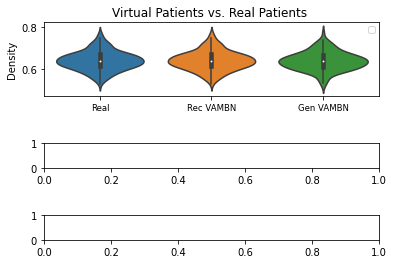

In [28]:
fig, (ax1, ax2,ax3) = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace': 1.15})
                
                #plt.subplots_adjust(hspace=0.8)
ax1 = seaborn.violinplot(data=[violrp,violrpvambn,violgenvambn], ax=ax1)
#ax1.scatter(x=[-0.045,0.955,1.955,2.955,3.955,4.955],y=np.nanmean([violrp,violrpvambn,violgenvambn],axis=1),c="r", label='Mean',zorder=10)
#ax1.scatter(x=[0.045,1.045,2.045,3.045,4.045,5.045],y=np.nanmedian([violrp,violrpvambn,violgenvambn],axis=1),c="aqua", label='Median',zorder=10)
               #viol.scatter(x=range(6),y=np.nanquantile([violgenpriorneural,violgenposteriorneural,violrpneural,violrp,violgenvambn,violrpvambn],axis=1,q=0.25),c="k", label='quartiles', linestyle='-')
                #viol.scatter(x=range(6),y=np.nanquantile([violgenpriorneural,violgenposteriorneural,violrpneural,violrp,violgenvambn,violrpvambn],axis=1,q=0.75),c="k")
ax1.set_xticklabels(['Real', 'Rec VAMBN','Gen VAMBN'],fontsize=8.5)
ax1.set_ylabel('Density')
ax1.set_title('Virtual Patients vs. Real Patients ')
ax1.legend(loc = 'upper right',prop={'size':8})

In [36]:
fig.patch.set_visible(False)
ax2.axis('off')
ax2.axis('tight')
                
cell_Text=[]
cell_Text.append(['Rec VAMBN',kl_rpvambn])
cell_Text.append(['Gen VAMBN',kl_genvambn])
tab = ax2.table(cellText=cell_Text, colLabels='KL-Div', loc='center')
tab.auto_set_font_size(False)
tab.set_fontsize(7)


In [39]:
seaborn.countplot(x=violgenvambn,ax=ax2)
ax2.set_title("GEN VAMBN")

Text(0.5, 1.0, 'GEN VAMBN')

In [38]:
var = 263
for i in range(148):
    varnumber = i 
    var = rpnode['varnames'][varnumber]
    
    for j in range(6):
        print(j)
        
        visitnumber = j
        
        if len(str(visitnumber))>1:
        
            if hasattr(rpvambn, var+'_VIS' + str(visitnumber)):
                violgenvambn=genvambn[var+'_VIS' + str(visitnumber)].values
            
                violrpvambn=rpvambn[var+'_VIS' + str(visitnumber)].values
        
                violrp=rp[var+'_VIS' + str(visitnumber)].values
                
                #vistime=genpriornode['orig_time'][visitnumber].item()
        
                #index = min(genpriornode['Generation_time'], key=lambda x:abs(x-vistime))
                
                #indhelp = genpriornode['Generation_time'].numpy()
                
                #timepoint = np.argmin(np.abs(indhelp-vistime))
                
                #violgenpriorneural=genpriornode['Generation_values'][:,timepoint,varnumber]
                
                #
                #vistime=genposteriornode['orig_time'][visitnumber].item()
                
                #index = min(genposteriornode['Generation_time'], key=lambda x:abs(x-vistime))
                
                #indhelp = genposteriornode['Generation_time'].numpy()
                
                #timepoint = np.argmin(np.abs(indhelp-vistime))
                
                #violgenposteriorneural=genposteriornode['Generation_values'][:,timepoint,varnumber]
                
                
                #vistime=rpnode['orig_time'][visitnumber].item()
                
                #index = min(rpnode['Recon_time'], key=lambda x:abs(x-vistime))
                
                #indhelp = rpnode['Recon_time'].numpy()
                
                #timepoint = np.argmin(np.abs(indhelp-vistime))
                
                #violrpneural=rpnode['Recon_values'][:,timepoint,varnumber]
                
                x_eval = np.arange(-5,5,step=0.001)
                
                density_real=gaussian_kde(violrp[~np.isnan(violrp)]) 
                density_real_val=density_real.evaluate(x_eval)
                
                #density_realneural=gaussian_kde(violrpneural[~np.isnan(violrpneural)]) 
                #density_realneural_val=density_realneural.evaluate(x_eval)
                
                #density_genpriorneural=gaussian_kde(violgenpriorneural[~np.isnan(violgenpriorneural)]) 
                #density_genpriorneural_val=density_genpriorneural.evaluate(x_eval)
                
                #density_genposteriorneural=gaussian_kde(violgenposteriorneural[~np.isnan(violgenposteriorneural)]) 
                #density_genposteriorneural_val=density_genposteriorneural.evaluate(x_eval)
                
                density_rpvambn=gaussian_kde(violrpvambn[~np.isnan(violrpvambn)]) 
                density_rpvambn_val=density_rpvambn.evaluate(x_eval)
                
                density_genvambn=gaussian_kde(violgenvambn[~np.isnan(violgenvambn)]) 
                density_genvambn_val=density_genvambn.evaluate(x_eval)
                
                eps = 1E-200
                eps = 0
                
                ks_rpvambn[i,j] =  ks_2samp(violrp,violrpvambn)[1]
                
                ks_genvambn[i,j] =  ks_2samp(violrp,violgenvambn)[1]
                
                mean_real[i,j] = np.nanmean(violrp)
                
                mean_rpnode[i,j] = np.nanmean(violrpneural)
                
                mean_genpriornode[i,j] = np.nanmean(violgenpriorneural)
                
                mean_genposteriornode[i,j] = np.nanmean(violgenposteriorneural)
                
                mean_rpvambn[i,j] =  np.nanmean(violrpvambn)
                
                mean_genvambn[i,j] =  np.nanmean(violgenvambn)
                
                sd_real[i,j] = np.nanstd(violrp)
                
                sd_rpvambn[i,j] =  np.nanstd(violrpvambn)
                
                sd_genvambn[i,j] =  np.nanstd(violgenvambn)
                
                q25_real[i,j] = np.nanquantile(violrp,q=0.25)
                
                q25_rpvambn[i,j] =  np.nanquantile(violrpvambn,q=0.25)
                
                q25_genvambn[i,j] =  np.nanquantile(violgenvambn,q=0.25)
                
                median_real[i,j] = np.nanquantile(violrp,q=0.5)
                
                median_rpvambn[i,j] =  np.nanquantile(violrpvambn,q=0.5)
                
                median_genvambn[i,j] =  np.nanquantile(violgenvambn,q=0.5)
                
                q75_real[i,j] = np.nanquantile(violrp,q=0.75)
                
                q75_rpvambn[i,j] =  np.nanquantile(violrpvambn,q=0.75)
                
                q75_genvambn[i,j] =  np.nanquantile(violgenvambn,q=0.75)
                
                
        else:
            if hasattr(rpvambn, var+'_VIS0' + str(visitnumber)):
                violgenvambn=genvambn[var+'_VIS0' + str(visitnumber)].values
            
                violrpvambn=rpvambn[var+'_VIS0' + str(visitnumber)].values
        
                violrp=rp[var+'_VIS0' + str(visitnumber)].values
                
                x_eval = np.arange(-5,5,step=0.001)
                
                density_real=gaussian_kde(violrp[~np.isnan(violrp)]) 
                density_real_val=density_real.evaluate(x_eval)
                               
                density_rpvambn=gaussian_kde(violrpvambn[~np.isnan(violrpvambn)]) 
                density_rpvambn_val=density_rpvambn.evaluate(x_eval)
                
                density_genvambn=gaussian_kde(violgenvambn[~np.isnan(violgenvambn)]) 
                density_genvambn_val=density_genvambn.evaluate(x_eval)
            
                eps = 1E-200
                eps = 0
                
                kl_rpvambn[i,j] = simps(y = density_real_val*np.log(density_real_val/(density_rpvambn_val+eps), out = np.zeros_like(density_rpvambn_val),where = (density_rpvambn_val!=0)), x=x_eval)

                kl_genvambn[i,j] = simps(y = density_real_val*np.log(density_real_val/(density_genvambn_val+eps), out = np.zeros_like(density_genvambn_val),where = (density_genvambn_val!=0)), x=x_eval)
                
                ks_rpvambn[i,j] =  ks_2samp(violrp,violrpvambn)[1]
                
                ks_genvambn[i,j] =  ks_2samp(violrp,violgenvambn)[1]
                
                mean_real[i,j] = np.nanmean(violrp)

                mean_rpvambn[i,j] =  np.nanmean(violrpvambn)
                
                mean_genvambn[i,j] =  np.nanmean(violgenvambn)
                
                sd_real[i,j] = np.nanstd(violrp)

                sd_rpvambn[i,j] =  np.nanstd(violrpvambn)
                
                sd_genvambn[i,j] =  np.nanstd(violgenvambn)
                
                q25_real[i,j] = np.nanquantile(violrp,q=0.25)
                
                q25_rpvambn[i,j] =  np.nanquantile(violrpvambn,q=0.25)
                
                q25_genvambn[i,j] =  np.nanquantile(violgenvambn,q=0.25)
                
                median_real[i,j] = np.nanquantile(violrp,q=0.5)
                
                median_rpvambn[i,j] =  np.nanquantile(violrpvambn,q=0.5)
                
                median_genvambn[i,j] =  np.nanquantile(violgenvambn,q=0.5)
                
                q75_real[i,j] = np.nanquantile(violrp,q=0.75)
                
                q75_rpvambn[i,j] =  np.nanquantile(violrpvambn,q=0.75)
                
                q75_genvambn[i,j] =  np.nanquantile(violgenvambn,q=0.75)
                

                

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
sd_rpvambn = np.round(sd_rpvambn,decimals=2)
sd_rpvambn = sd_rpvambn + 0

sd_genvambn = np.round(sd_genvambn,decimals=2)
sd_genvambn = sd_genvambn + 0

q25_real = np.round(q25_real,decimals=2)
q25_real = q25_real + 0 
